# Water Quality Analysis

For the water quality analysis task, I will be using a Kaggle dataset that contains data on all of the major factors that affect the potability of water. All of the factors that affect water quality are very important, so we need to briefly explore each feature of this dataset before training a machine learning model to predict whether a water sample is safe or unsuitable for consumption

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
plt.style.use("dark_background")

In [2]:
data= pd.read_csv("C:\kaggle datasets\Water Quality Index.csv")

In [3]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Here we can see there are multiple rows with null values. So, we need to remove those datasets that contains null values.

In [4]:
data= data.dropna()
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [5]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Here we can see there are no rows with null values. Now we can work on this data.

The Potability column of this dataset is the column we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption. So let’s see the distribution of 0 and 1 in the Potability column:

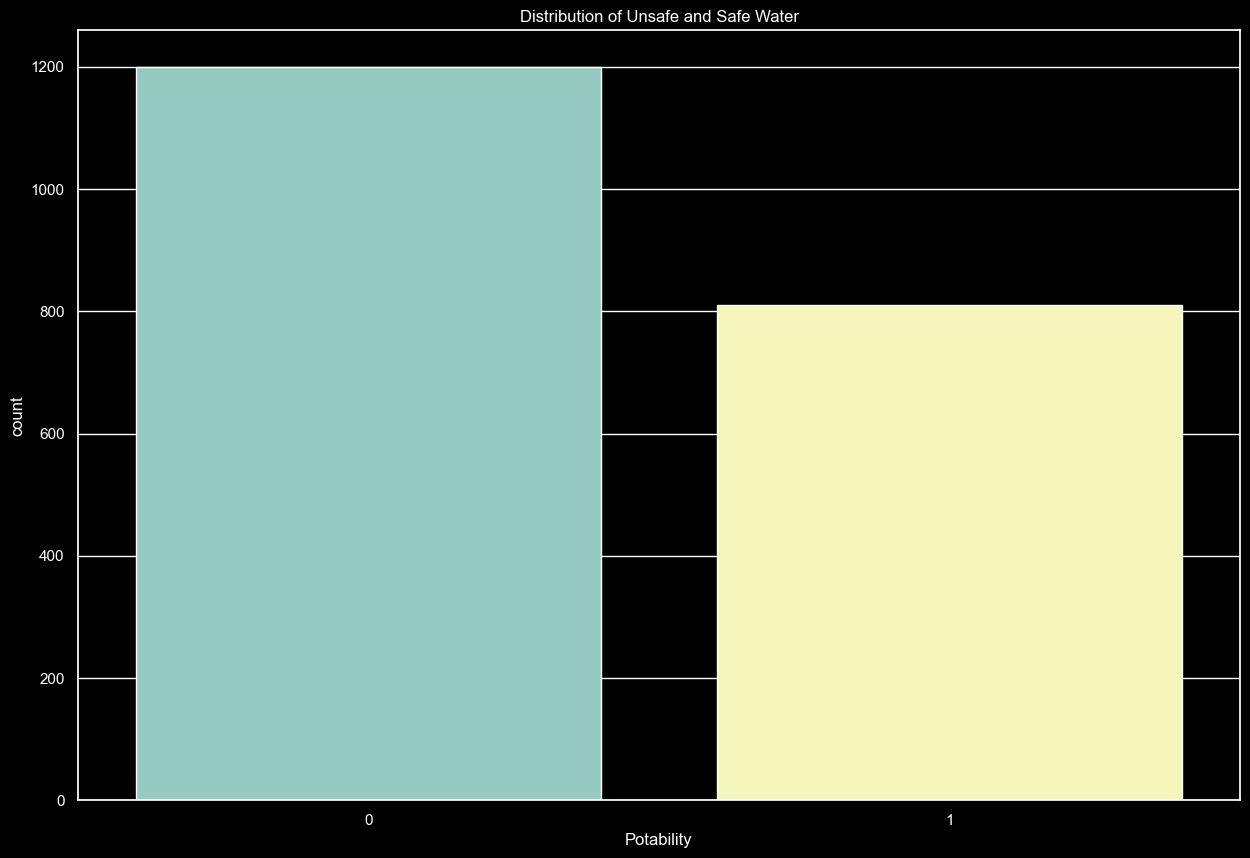

In [7]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Potability", data=data)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [8]:
data["Potability"].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

We can see both graphs and value_counts function is demonstrating the same thing that data is not balanced. Here the number of zeros are greater than number of ones.

As mentioned above, there are no factors that we can ignore that affect water quality, so let’s explore all the columns one by one. Let’s start by looking at the ph column:

In [16]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

The ph column represents the ph value of the water which is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5. Now let’s look at the second factor affecting water quality in the dataset:

In [17]:
figure=px.histogram(data,x="Hardness",color="Potability",title="Factors Affecting Water Quality: Hardness")
figure.show()

The figure above shows the distribution of water hardness in the dataset. The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable. Now let’s take a look at the next factor affecting water quality:

In [18]:
Figure= px.histogram(data, x="Solids",color="Potability",title="Factors Affecting Water Quality: Solids")
Figure.show()

The figure above represents the distribution of total dissolved solids in water in the dataset. All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized. Now let’s take a look at the next factor affecting water quality:

In [19]:
figure= px.histogram(data,x="Chloramines",color="Potability",title="Factors Affecting Water Quality: Chloramines")
figure.show()

The figure above represents the distribution of chloramine in water in the dataset. Chloramine and chlorine are disinfectants used in public water systems. Now let’s take a look at the next factor affecting water quality:

In [20]:
figure=px.histogram(data,x="Sulfate",color="Potability",title="Factors Affecting Water Quality: Sulfate")

In [21]:
figure.show()

The figure above shows the distribution of sulfate in water in the dataset. They are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink. Now let’s see the next factor:

In [22]:
figure = px.histogram(data, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

The figure above represents the distribution of water conductivity in the dataset. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable. Now let’s see the next factor:

In [23]:
figure = px.histogram(data, x = "Organic_carbon", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

The figure above represents the distribution of organic carbon in water in the dataset. Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink. Now let’s take a look at the next factor that affects the quality of drinking water:



In [24]:
figure = px.histogram(data, x = "Trihalomethanes", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

The figure above represents the distribution of trihalomethanes or THMs in water in the dataset. THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink. Now let’s take a look at the next factor in the dataset that affects drinking water quality:

In [25]:
figure = px.histogram(data, x = "Turbidity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

The figure above represents the distribution of turbidity in water. The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable.

In [29]:
# pip install pycaret


In [26]:
correlation = data.corr()
# print(correlation)
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

In [12]:
from pycaret.classification import *
clf = setup(data, target = "Potability",verbose=False, session_id = 786)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6802,0.6956,0.3952,0.6778,0.4977,0.2870,0.3100,0.1390
rf,Random Forest Classifier,0.6780,0.6844,0.4040,0.6696,0.5024,0.2854,0.3063,0.2300
qda,Quadratic Discriminant Analysis,0.6745,0.7091,0.3866,0.6795,0.4879,0.2746,0.3013,0.0160
gbc,Gradient Boosting Classifier,0.6532,0.6558,0.3564,0.6297,0.4517,0.2257,0.2473,0.2880
lightgbm,Light Gradient Boosting Machine,0.6432,0.6658,0.4869,0.5719,0.5232,0.2416,0.2453,0.1730
nb,Naive Bayes,0.6212,0.6280,0.2506,0.5728,0.3474,0.1344,0.1581,0.0160
lr,Logistic Regression,0.6020,0.5077,0.0335,0.6133,0.0631,0.0227,0.0624,1.3300
ridge,Ridge Classifier,0.5984,0.5188,0.0282,0.6267,0.0534,0.0137,0.0499,0.0200
lda,Linear Discriminant Analysis,0.5970,0.5189,0.0299,0.5867,0.0564,0.0115,0.0421,0.0160
dummy,Dummy Classifier,0.5970,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0150


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=786, verbose=0,
                     warm_start=False)

According to the above result, the Extra Tree classifier algorithm is best for training a machine learning model for the task of water quality analysis. So let’s train the model and examine its predictions:

In [27]:
model = create_model("et")
predict = predict_model(model, data=data)
predict.head()


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6525,0.6544,0.3509,0.6250,0.4494,0.2238,0.2437
1,0.6879,0.7289,0.3860,0.7097,0.5000,0.3009,0.3304
2,0.6596,0.6682,0.3158,0.6667,0.4286,0.2279,0.2602
3,0.6950,0.7311,0.4035,0.7188,0.5169,0.3188,0.3472
4,0.6454,0.6211,0.3333,0.6129,0.4318,0.2055,0.2257
5,0.6525,0.7076,0.4211,0.6000,0.4948,0.2422,0.2510
6,0.7163,0.7422,0.4737,0.7297,0.5745,0.3758,0.3956
7,0.7143,0.7067,0.4107,0.7667,0.5349,0.3548,0.3909
8,0.7071,0.7133,0.4821,0.6923,0.5684,0.3574,0.3708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9040,0.9738,0.8126,0.9414,0.8723,0.7961,0.8016


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,1.00
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,1.00
5,5.584086,188.313324,28748.687500,7.544869,326.678375,280.467926,8.399734,54.917862,2.559708,0,0,1.00
6,10.223862,248.071732,28749.716797,7.513409,393.663391,283.651642,13.789696,84.603554,2.672989,0,0,0.62
7,8.635849,203.361526,13672.091797,4.563009,303.309784,474.607635,12.363816,62.798309,4.401425,0,0,1.00


So this is how we can analyze the quality of water and train a machine learning model to classify safe and unsafe water for drinking. Access to safe drinking water is one of the essential needs of all human beings. From a legal point of view, access to drinking water is one of the fundamental human rights. Many factors affect water quality, it is also one of the major research areas in machine learning.